In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load ARFF file into pandas DataFrame
def load_arff(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    data_start = False
    data = []
    attribute_names = []
    for line in lines:
        if not data_start:
            if line.strip().lower() == '@data':
                data_start = True
            elif line.strip().lower().startswith('@attribute'):
                attribute_names.append(line.split()[1])
        else:
            data.append(line.strip().split(','))

    df = pd.DataFrame(data, columns=attribute_names)
    return df

# Load data from ARFF file
filename = "C:/Users/HP/Desktop/Assignment DSP/CEE_DATA.arff"
df = load_arff(filename)

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

  'Performance' 'Gender'    'Caste' 'coaching' 'time' 'Class_ten_education'  \
0   'Excellent'   'male'  'General'       'NO'  'ONE'                'SEBA'   
1   'Excellent'   'male'      'OBC'       'WA'  'TWO'                'SEBA'   
2   'Excellent'   'male'      'OBC'       'OA'  'TWO'              'OTHERS'   
3   'Excellent'   'male'  'General'       'WA'  'ONE'                'SEBA'   
4   'Excellent'   'male'  'General'       'OA'  'TWO'                'SEBA'   

  'twelve_education'   'medium' 'Class_X_Percentage' 'Class_XII_Percentage'  \
0            'AHSEC'  'ENGLISH'          'Excellent'            'Excellent'   
1            'AHSEC'   'OTHERS'          'Excellent'            'Excellent'   
2             'CBSE'  'ENGLISH'          'Excellent'            'Excellent'   
3            'AHSEC'   'OTHERS'          'Excellent'            'Excellent'   
4             'CBSE'  'ENGLISH'          'Excellent'            'Excellent'   

  'Father_occupation' 'Mother_occupation'  
0     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   'Performance'           666 non-null    object
 1   'Gender'                666 non-null    object
 2   'Caste'                 666 non-null    object
 3   'coaching'              666 non-null    object
 4   'time'                  666 non-null    object
 5   'Class_ten_education'   666 non-null    object
 6   'twelve_education'      666 non-null    object
 7   'medium'                666 non-null    object
 8   'Class_X_Percentage'    666 non-null    object
 9   'Class_XII_Percentage'  666 non-null    object
 10  'Father_occupation'     666 non-null    object
 11  'Mother_occupation'     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB
None
Unique values for 'Performance': ["'Excellent'" "'Vg'" "'Good'" "'Average'"]
Unique values for 'Gender': ["'male'" "'fem

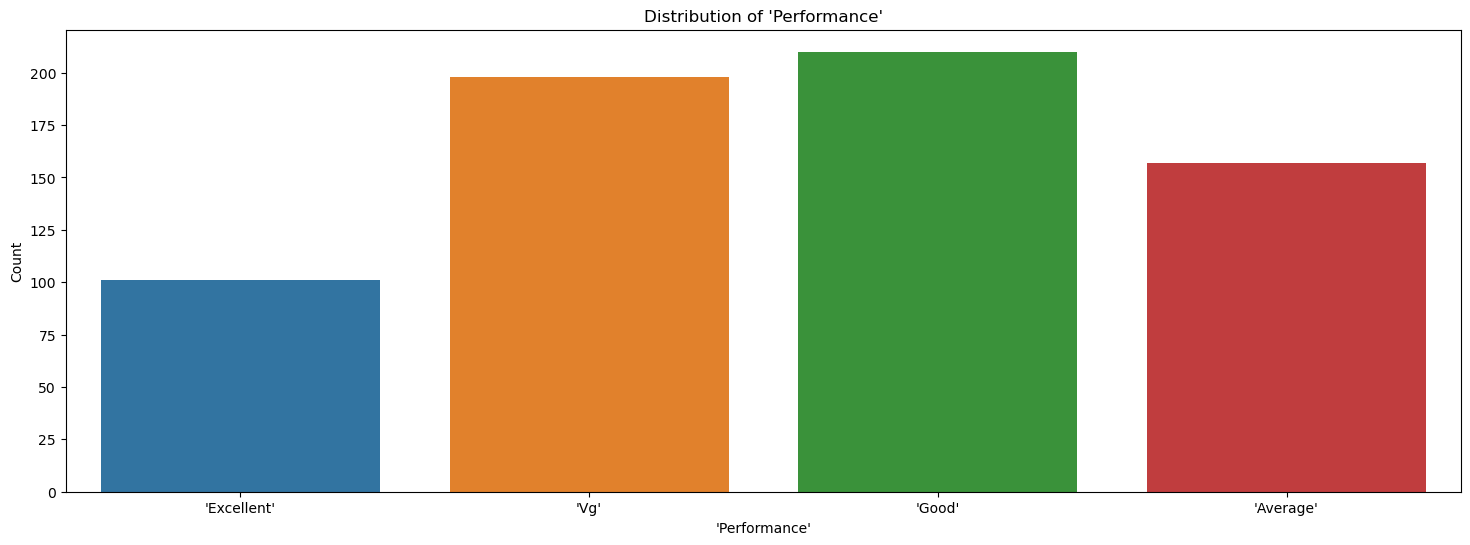


Column: 'Gender'
'male'      355
'female'    311
Name: 'Gender', dtype: int64


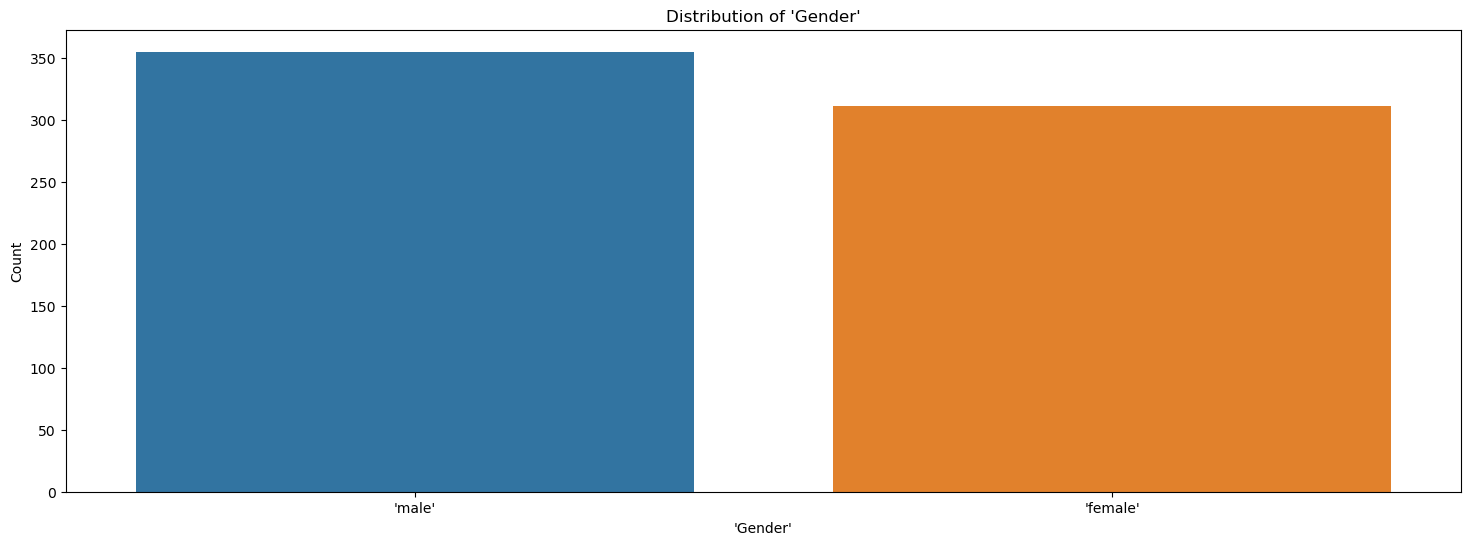


Column: 'Caste'
'General'    329
'OBC'        162
'ST'         108
'SC'          67
Name: 'Caste', dtype: int64


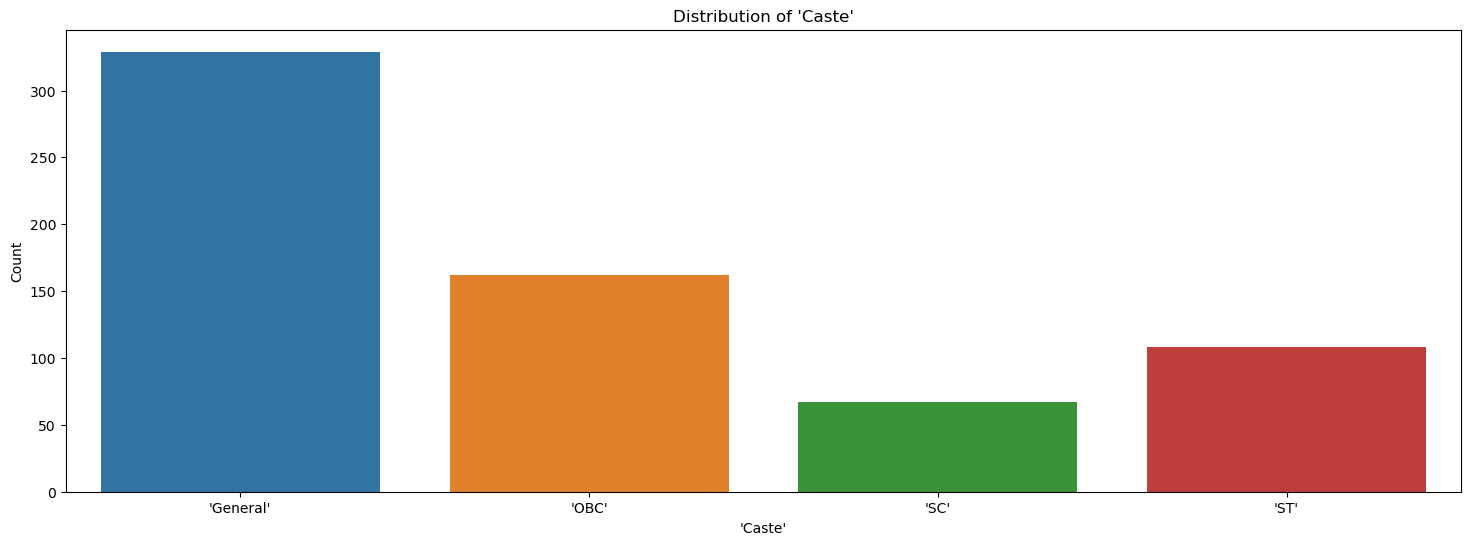


Column: 'coaching'
'WA'    449
'NO'    150
'OA'     67
Name: 'coaching', dtype: int64


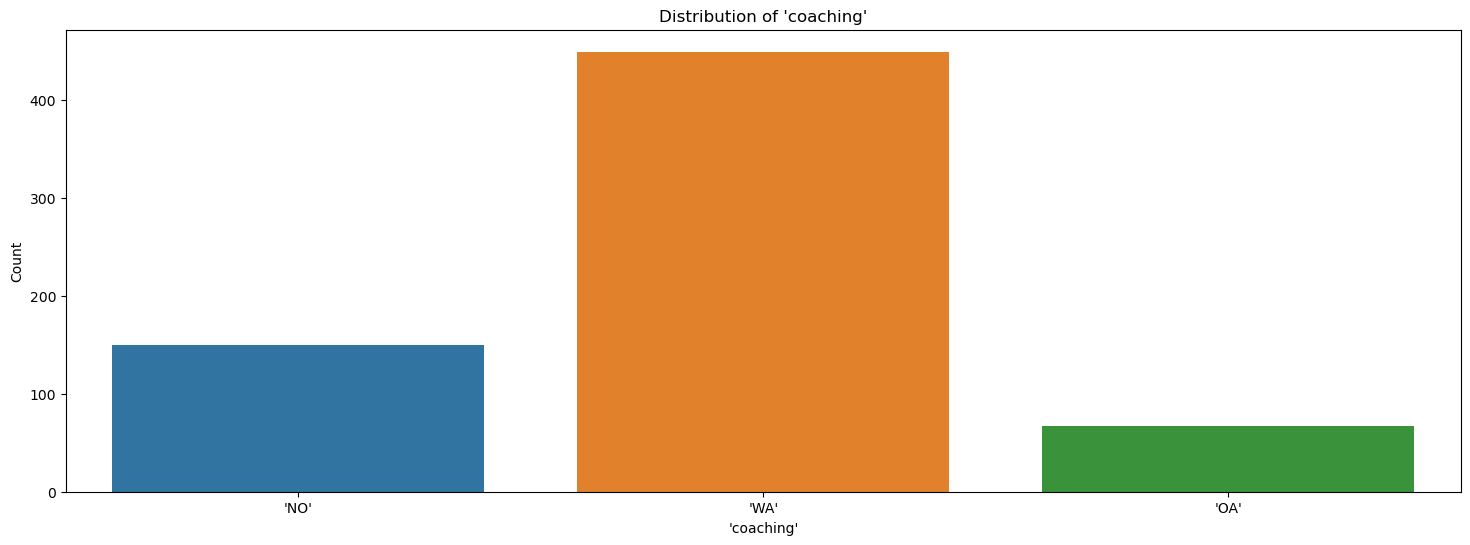


Column: 'time'
'TWO'      368
'ONE'      199
'THREE'     86
'FOUR'      11
'FIVE'       1
'SEVEN'      1
Name: 'time', dtype: int64


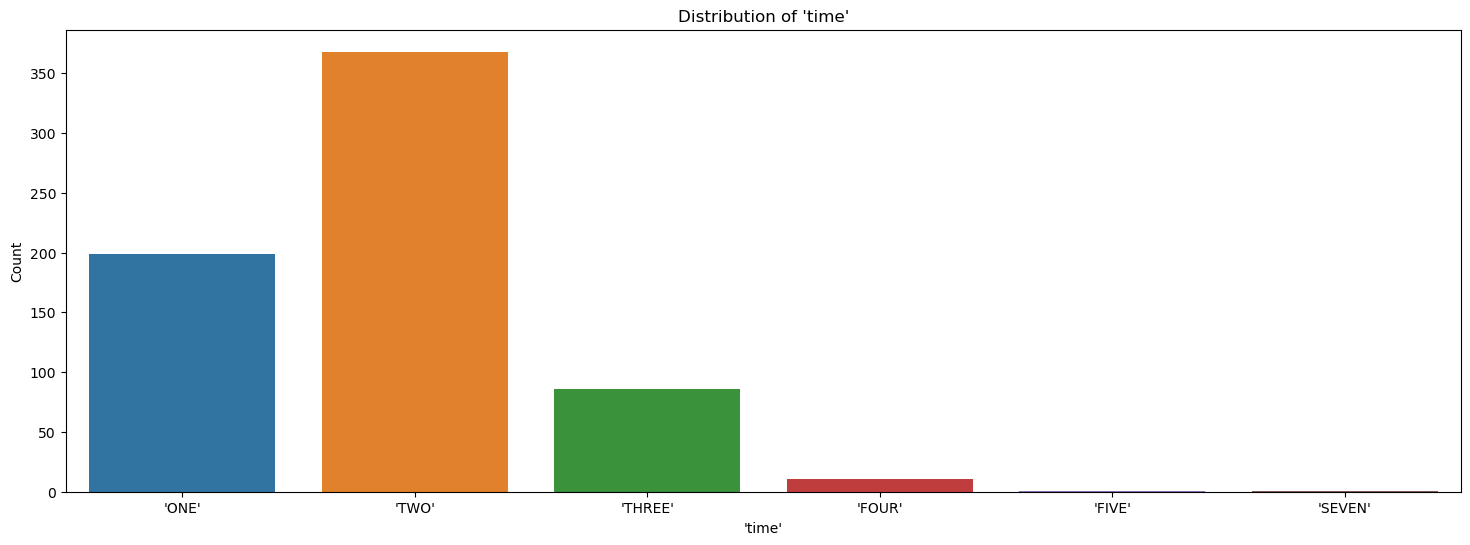


Column: 'Class_ten_education'
'SEBA'      396
'CBSE'      249
'OTHERS'     21
Name: 'Class_ten_education', dtype: int64


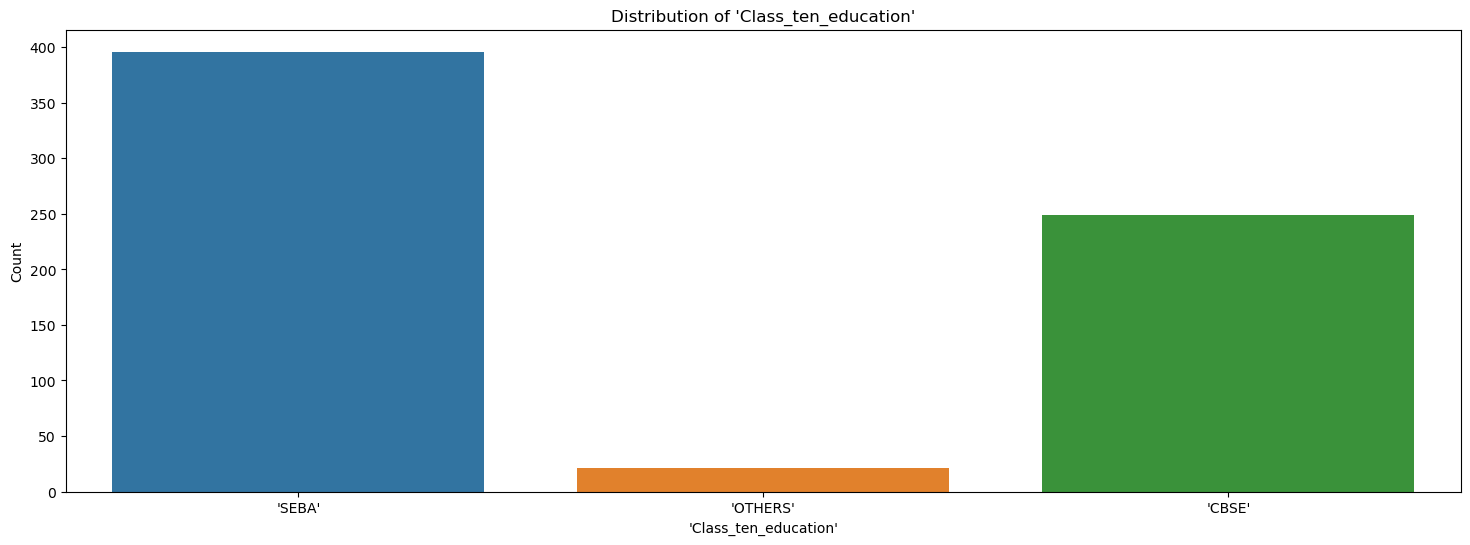


Column: 'twelve_education'
'AHSEC'     368
'CBSE'      290
'OTHERS'      8
Name: 'twelve_education', dtype: int64


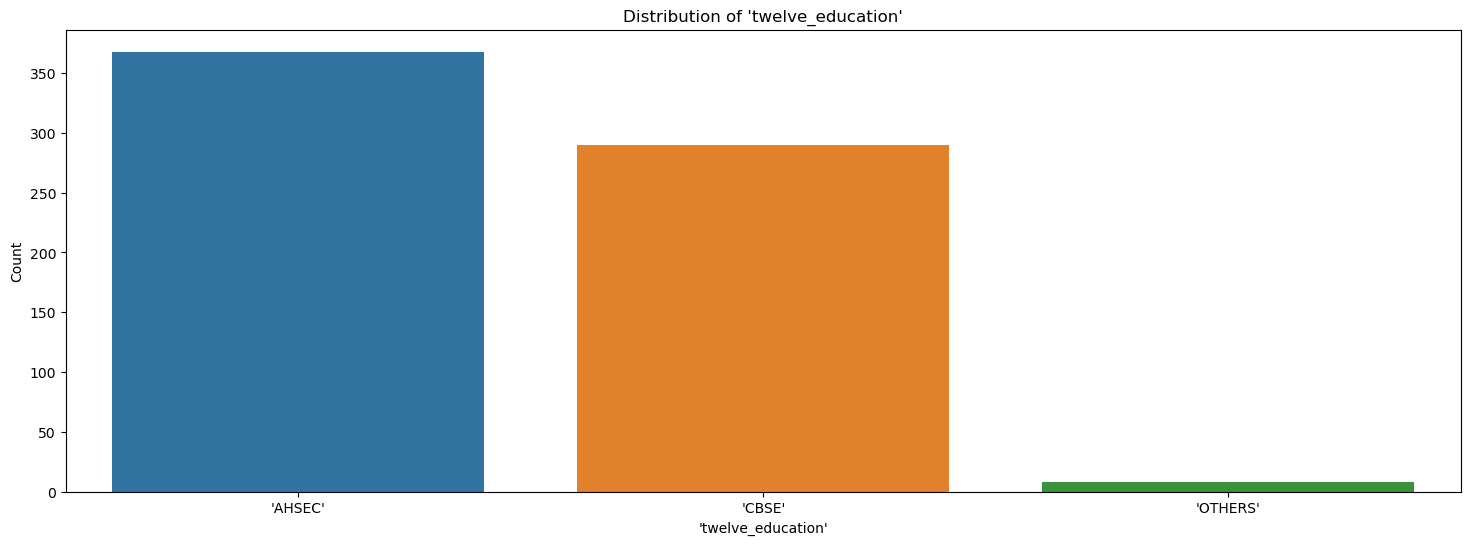


Column: 'medium'
'ENGLISH'     536
'OTHERS'       74
'ASSAMESE'     56
Name: 'medium', dtype: int64


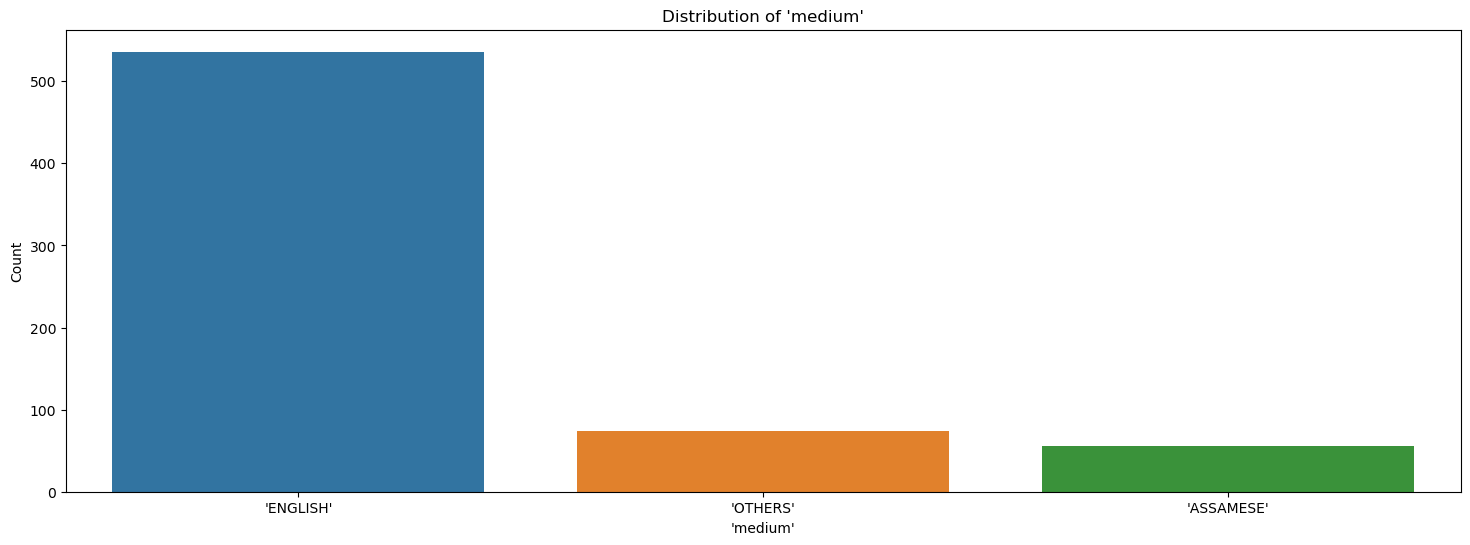


Column: 'Class_X_Percentage'
'Excellent'    511
'Vg'           101
'Good'          41
'Average'       13
Name: 'Class_X_Percentage', dtype: int64


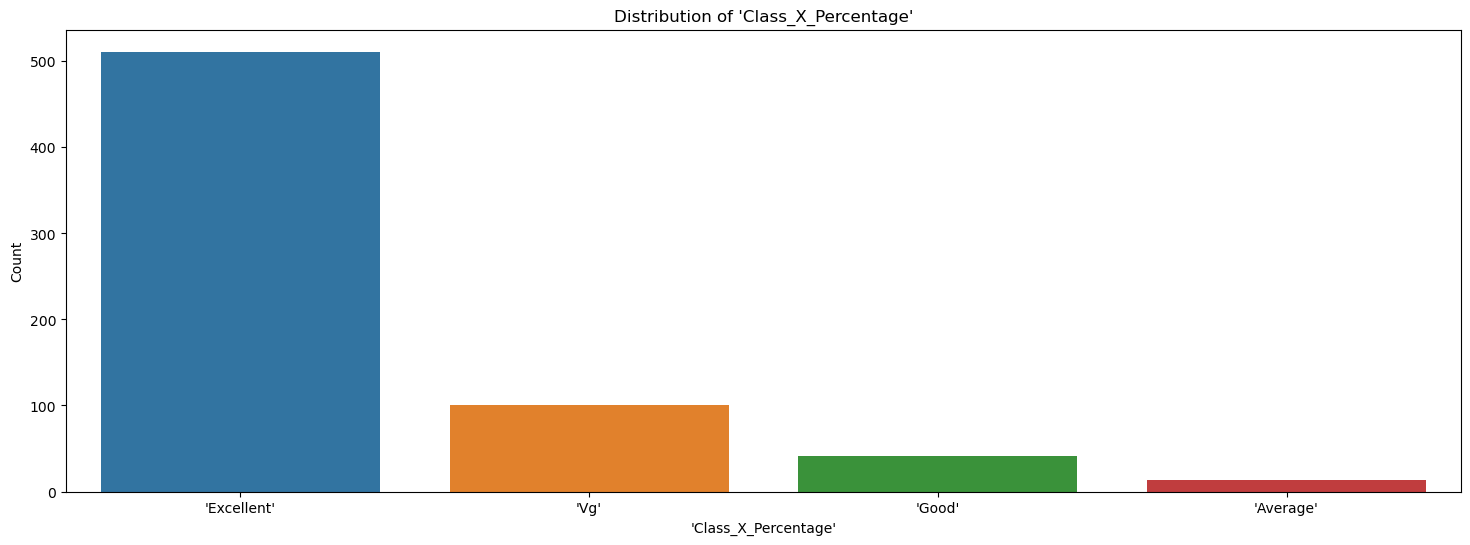


Column: 'Class_XII_Percentage'
'Excellent'    398
'Vg'           181
'Good'          75
'Average'       12
Name: 'Class_XII_Percentage', dtype: int64


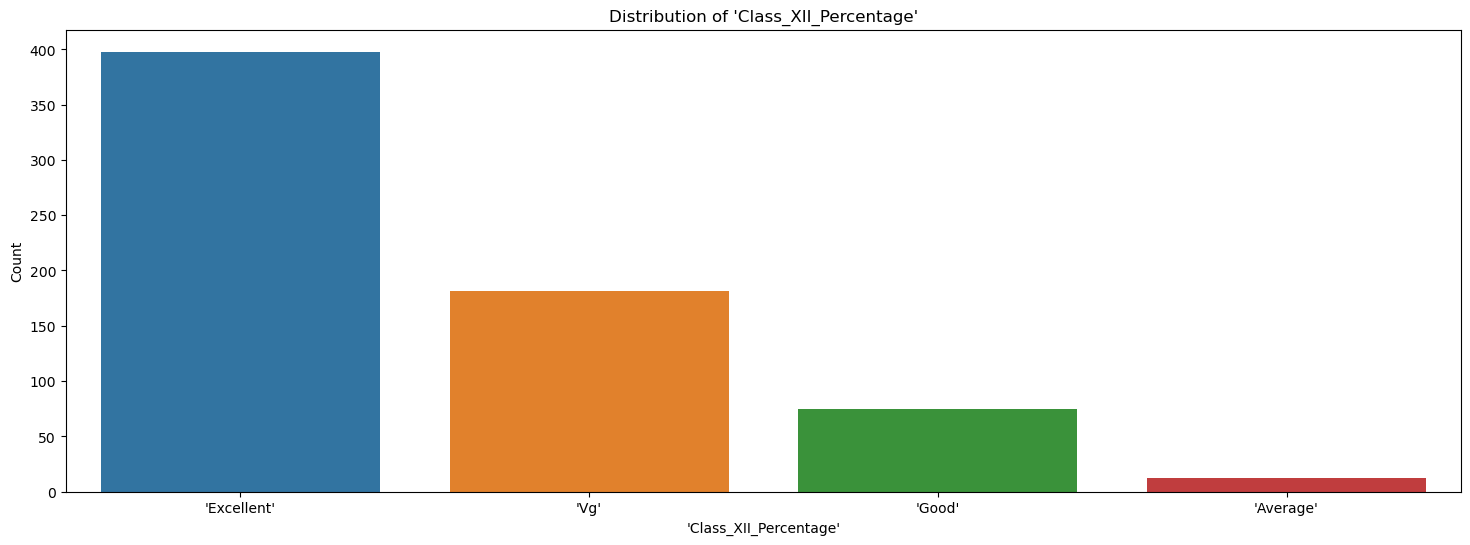


Column: 'Father_occupation'
'OTHERS'             277
'SCHOOL_TEACHER'     109
'BUSINESS'           103
'DOCTOR'              55
'ENGINEER'            45
'COLLEGE_TEACHER'     27
'CULTIVATOR'          27
'BANK_OFFICIAL'       23
Name: 'Father_occupation', dtype: int64


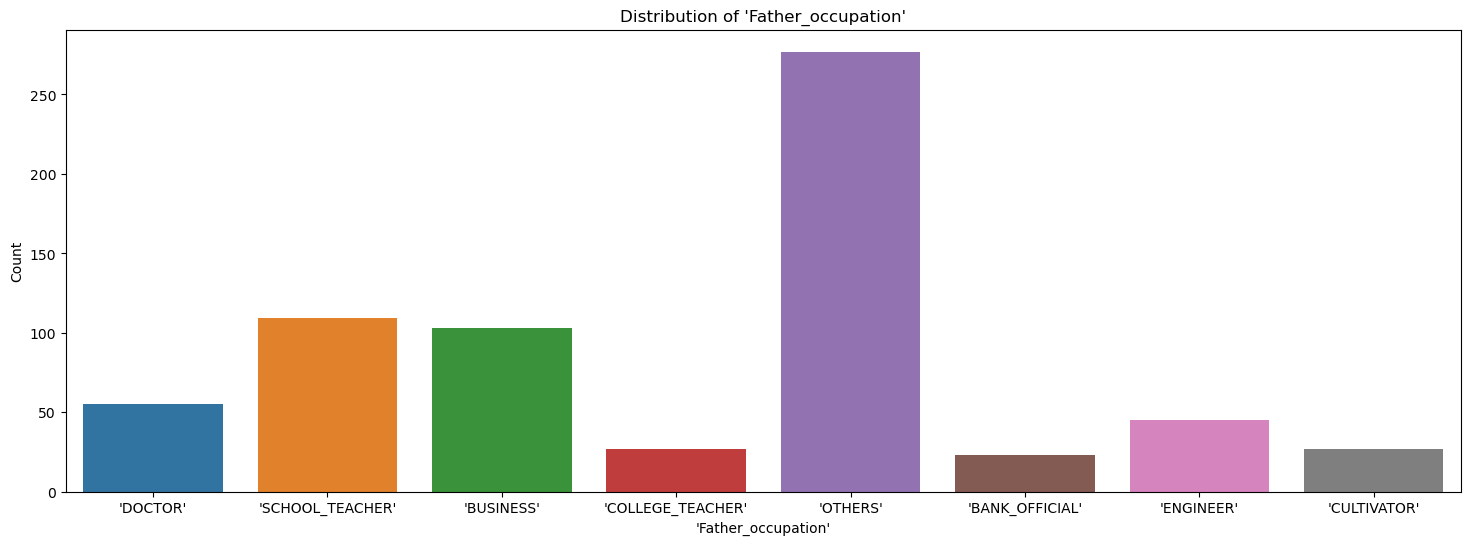


Column: 'Mother_occupation'
'HOUSE_WIFE'         442
'SCHOOL_TEACHER'     108
'OTHERS'              72
'COLLEGE_TEACHER'     20
'DOCTOR'              13
'BANK_OFFICIAL'        4
'BUSINESS'             3
'ENGINEER'             3
'CULTIVATOR'           1
Name: 'Mother_occupation', dtype: int64


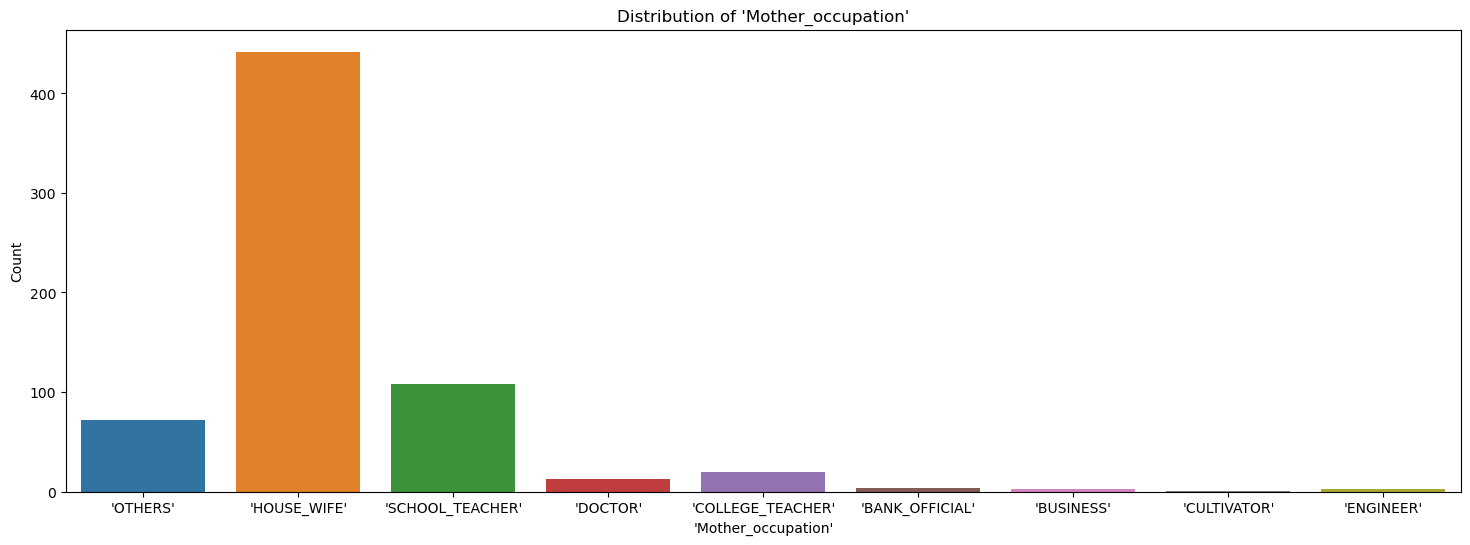

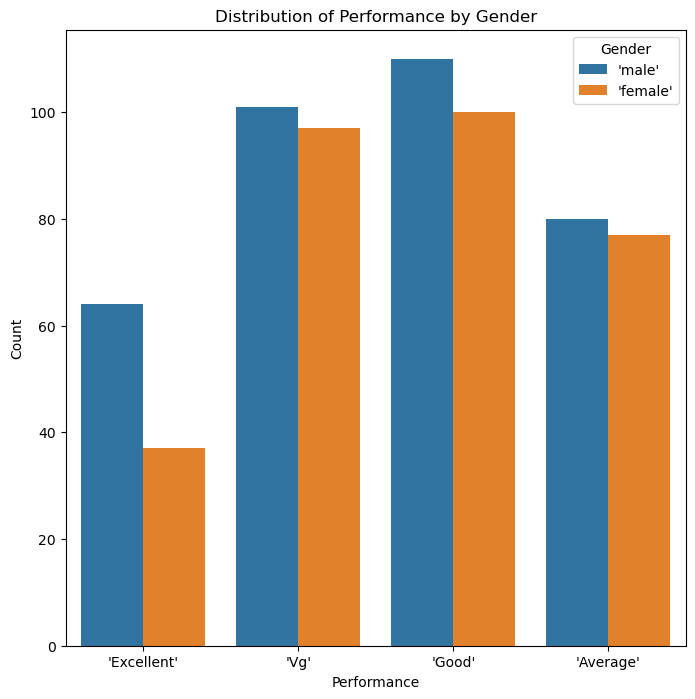

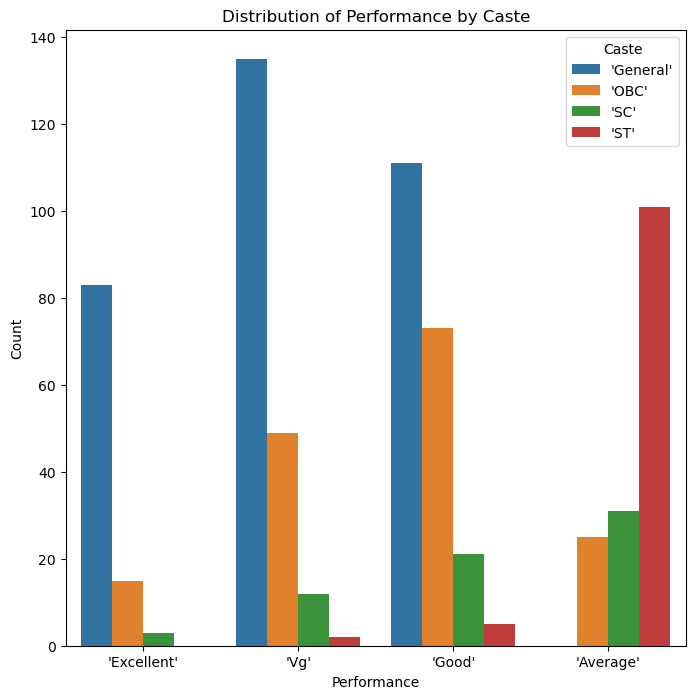

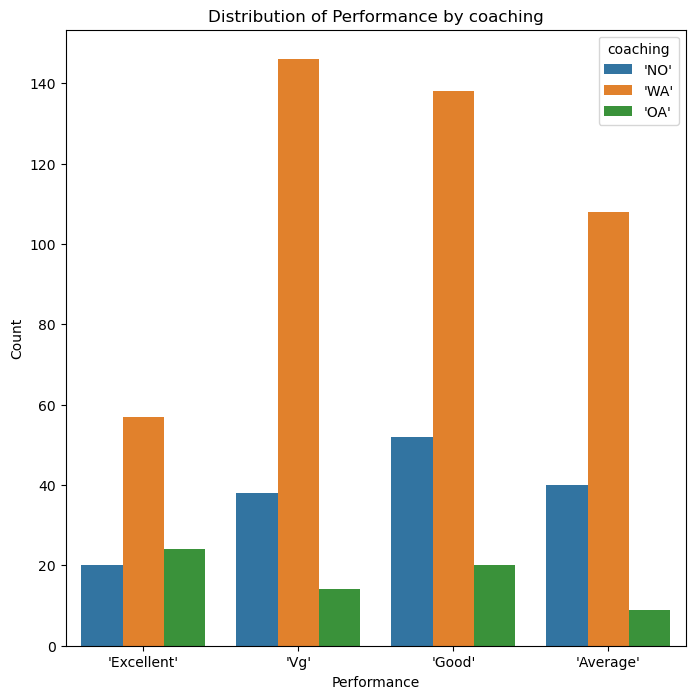

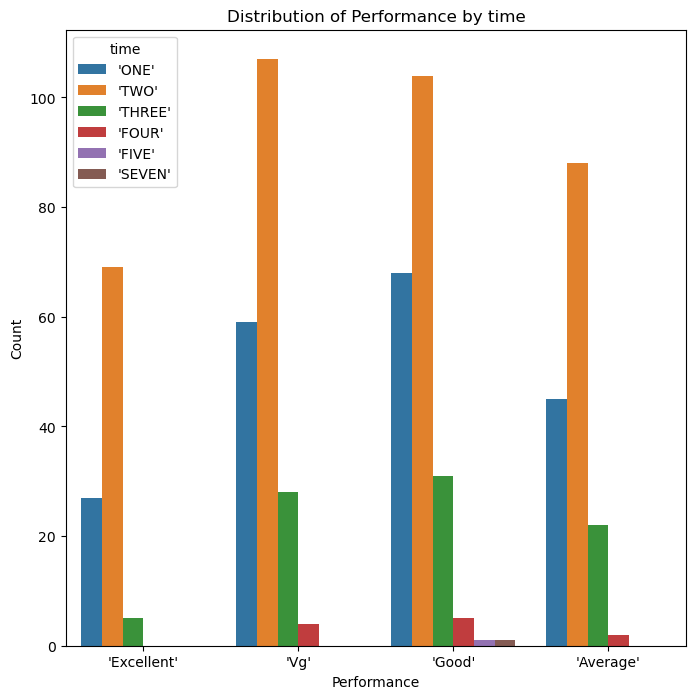

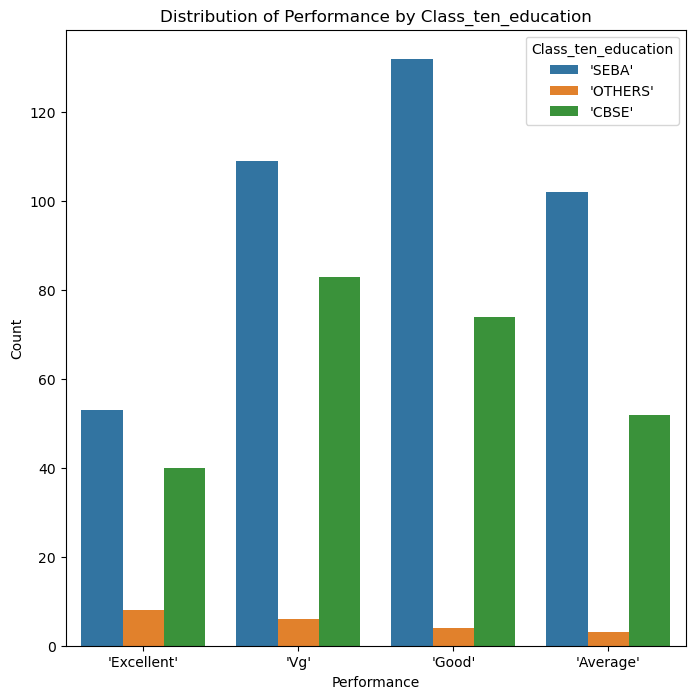

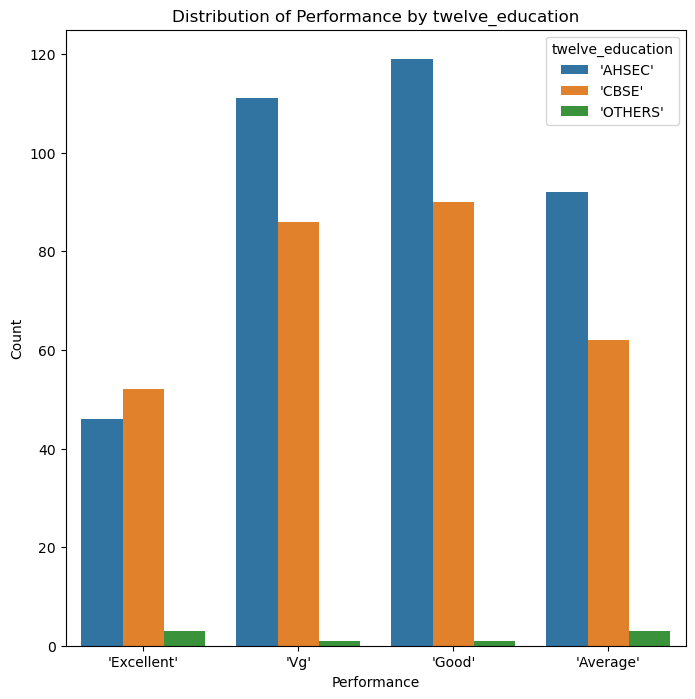

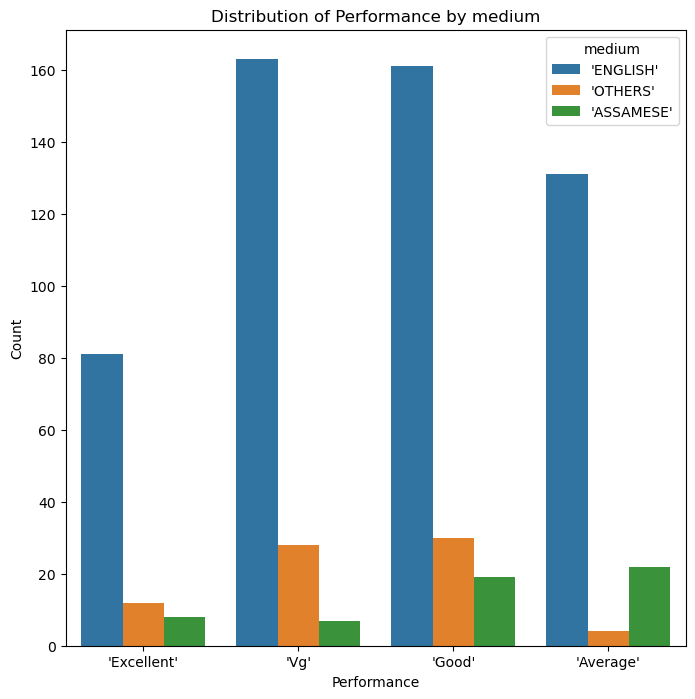

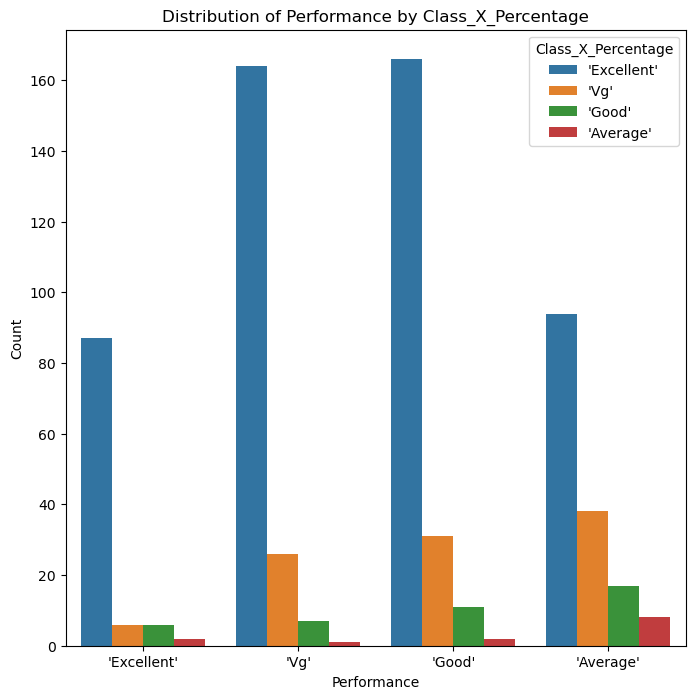

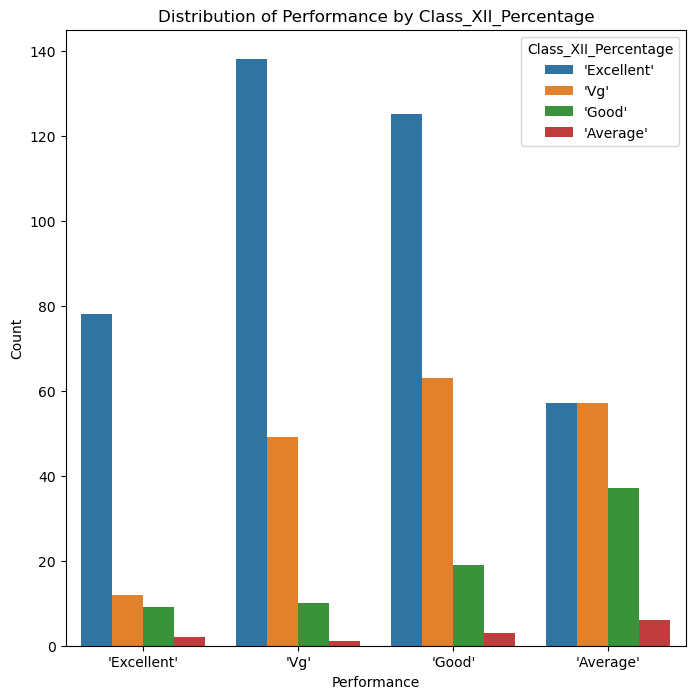

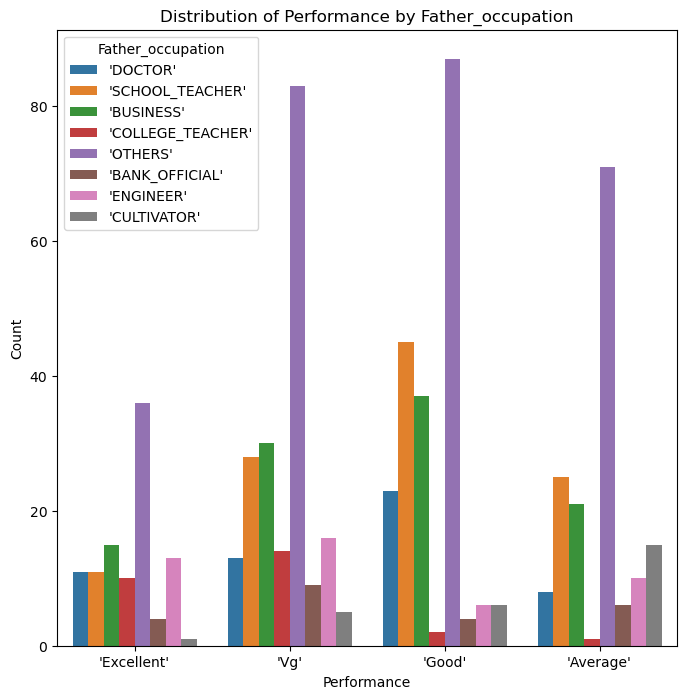

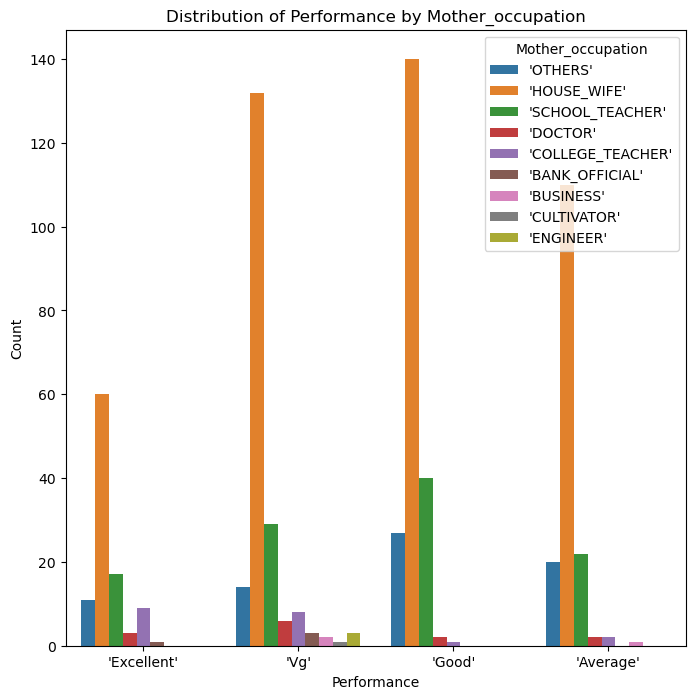


Chi-Square Test: Gender vs Performance
Chi-square statistic: 4.95
p-value: 0.1757
Degrees of freedom: 3
There is no statistically significant association.

Chi-Square Test: Caste vs Performance
Chi-square statistic: 448.24
p-value: 0.0000
Degrees of freedom: 9
There is a statistically significant association.

Chi-Square Test: coaching vs Performance
Chi-square statistic: 29.09
p-value: 0.0001
Degrees of freedom: 6
There is a statistically significant association.

Chi-Square Test: time vs Performance
Chi-square statistic: 18.17
p-value: 0.2538
Degrees of freedom: 15
There is no statistically significant association.

Chi-Square Test: Class_ten_education vs Performance
Chi-square statistic: 14.03
p-value: 0.0293
Degrees of freedom: 6
There is a statistically significant association.

Chi-Square Test: twelve_education vs Performance
Chi-square statistic: 9.23
p-value: 0.1613
Degrees of freedom: 6
There is no statistically significant association.

Chi-Square Test: medium vs Performance

In [4]:
# Display information about the DataFrame
print(df.info())

# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

# EDA
# Univariate Analysis
# Iterate through each object column
for column in df.select_dtypes(include=[object]):
    # Print value counts
    print(f"\nColumn: {column}")
    print(df[column].value_counts())

    # Visualization (e.g., bar charts, pie charts)
    plt.figure(figsize=(18, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# Bivariate Analysis
# List of categorical variables (excluding 'Performance')
categorical_variables = ['Gender', 'Caste', 'coaching', 'time', 
                         'Class_ten_education', 'twelve_education', 'medium', 
                         'Class_X_Percentage','Class_XII_Percentage', 'Father_occupation', 
                         'Mother_occupation']

# Remove single quotes from column names
df.columns = df.columns.str.strip("'")

# Iterate through each categorical variable
for variable in categorical_variables:
    # Plot the distribution of 'Performance' by the current variable
    plt.figure(figsize=(8, 8))
    sns.countplot(data=df, x="Performance", hue=variable)
    plt.title(f"Distribution of Performance by {variable}")
    plt.xlabel("Performance")
    plt.ylabel("Count")
    plt.legend(title=variable)
    plt.show()

# Chi-Square Tests
# Performance column as reference for chi-square tests
reference_column = "Performance"

# Loop through each categorical variable
for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df[reference_column])
    chi2, pval, dof, expected = chi2_contingency(contingency_table.values)

    # Print test results
    print(f"\nChi-Square Test: {variable} vs {reference_column}")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {pval:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation based on p-value
    if pval < 0.05:
        print("There is a statistically significant association.")
    else:
        print("There is no statistically significant association.")

In [5]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64


In [6]:
performance_counts = df['Performance'].value_counts()
print(performance_counts)

'Good'         210
'Vg'           198
'Average'      157
'Excellent'    101
Name: Performance, dtype: int64


In [7]:
# Check the unique values before mapping
print("Unique values in 'Performance' before mapping:")
print(df['Performance'].unique())

Unique values in 'Performance' before mapping:
["'Excellent'" "'Vg'" "'Good'" "'Average'"]


In [8]:
# Strip single quotes from the values in the 'Performance' column
df['Performance'] = df['Performance'].str.strip("'")

# Combine categories in the target variable 'Performance'
df['Performance'] = df['Performance'].map({
    'Excellent': 'Good',
    'Vg': 'Good',
    'Good': 'Average',
    'Average': 'Average'
})

In [9]:
# Check for NaN values after mapping
print("Unique values in 'Performance' after mapping:")
print(df['Performance'].unique())
print(df['Class_X_Percentage'].unique())

# Check the value counts after mapping
print("Value counts in 'Performance' after mapping:")
print(df['Performance'].value_counts())

Unique values in 'Performance' after mapping:
['Good' 'Average']
["'Excellent'" "'Vg'" "'Good'" "'Average'"]
Value counts in 'Performance' after mapping:
Average    367
Good       299
Name: Performance, dtype: int64


In [10]:
# Label encode the target variable
label_encoder = LabelEncoder()
df['Performance'] = label_encoder.fit_transform(df['Performance'])

# Define the nominal and ordinal variables
nominal_variables = ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 'medium', 'Father_occupation', 'Mother_occupation']
ordinal_variables = ['time', 'Class_X_Percentage', 'Class_XII_Percentage']

# Define ordinal encoding mappings
ordinal_mapping = {
    'time': {"'ONE'": 1, "'TWO'": 2, "'THREE'": 3, "'FOUR'": 4, "'FIVE'": 5, "'SEVEN'": 7},
    'Class_X_Percentage': {"'Excellent'": 4, "'Vg'": 3, "'Good'": 2, "'Average'": 1},
    'Class_XII_Percentage': {"'Excellent'": 4, "'Vg'": 3, "'Good'": 2, "'Average'": 1}
}


# Apply ordinal encoding manually
for column, mapping in ordinal_mapping.items():
    df[column] = df[column].map(mapping)

# One-hot encode nominal variables
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
nominal_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[nominal_variables]), columns=one_hot_encoder.get_feature_names_out(nominal_variables))

# Drop original nominal variables
df.drop(columns=nominal_variables, inplace=True)

# Combine encoded variables with the rest of the DataFrame
df_encoded = pd.concat([df, nominal_encoded], axis=1)

In [11]:
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Performance  time  Class_X_Percentage  Class_XII_Percentage  Gender_'male'  \
0            1     1                   4                     4            1.0   
1            1     2                   4                     4            1.0   
2            1     2                   4                     4            1.0   
3            1     1                   4                     4            1.0   
4            1     2                   4                     4            1.0   

   Caste_'OBC'  Caste_'SC'  Caste_'ST'  coaching_'OA'  coaching_'WA'  ...  \
0          0.0         0.0         0.0            0.0            0.0  ...   
1          1.0         0.0         0.0            0.0            1.0  ...   
2          1.0         0.0         0.0            1.0            0.0  ...   
3          0.0         0.0         0.0            0.0            1.0  ...   
4          0.0         0.0         0.0            1.0            0.0  ...   

   Father_occupation_'OTHERS'  Father_occupation_'

In [12]:
# Display information about the encoded DataFrame
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Performance                          666 non-null    int32  
 1   time                                 666 non-null    int64  
 2   Class_X_Percentage                   666 non-null    int64  
 3   Class_XII_Percentage                 666 non-null    int64  
 4   Gender_'male'                        666 non-null    float64
 5   Caste_'OBC'                          666 non-null    float64
 6   Caste_'SC'                           666 non-null    float64
 7   Caste_'ST'                           666 non-null    float64
 8   coaching_'OA'                        666 non-null    float64
 9   coaching_'WA'                        666 non-null    float64
 10  Class_ten_education_'OTHERS'         666 non-null    float64
 11  Class_ten_education_'SEBA'      

Accuracy: 0.6870748299319728
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        69
           1       0.72      0.68      0.70        78

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.69      0.69      0.69       147

[[48 21]
 [25 53]]


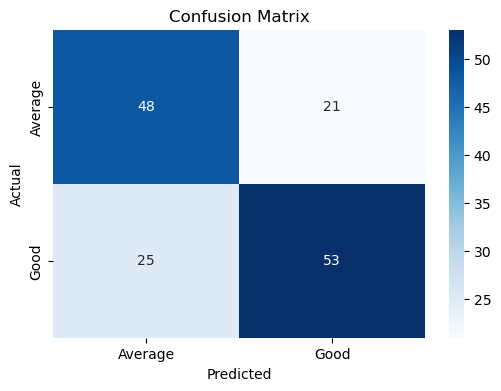

In [20]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['Performance'])
y = df_encoded['Performance']

# Oversample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Good'], yticklabels=['Average', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = df_encoded.columns.tolist()
importance_data = list(zip(feature_names, feature_importances))
importance_data.sort(key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in importance_data:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature Importances:
Feature: Caste_'SC', Importance: 0.1263
Feature: Performance, Importance: 0.0846
Feature: Class_X_Percentage, Importance: 0.0752
Feature: Class_XII_Percentage, Importance: 0.0638
Feature: Gender_'male', Importance: 0.0592
Feature: coaching_'OA', Importance: 0.0529
Feature: time, Importance: 0.0492
Feature: Caste_'OBC', Importance: 0.0428
Feature: Class_ten_education_'OTHERS', Importance: 0.0413
Feature: Class_ten_education_'SEBA', Importance: 0.0406
Feature: Father_occupation_'ENGINEER', Importance: 0.0382
Feature: medium_'OTHERS', Importance: 0.0310
Feature: Mother_occupation_'ENGINEER', Importance: 0.0308
Feature: medium_'ENGLISH', Importance: 0.0283
Feature: Mother_occupation_'OTHERS', Importance: 0.0263
Feature: Father_occupation_'OTHERS', Importance: 0.0256
Feature: twelve_education_'OTHERS', Importance: 0.0249
Feature: Mother_occupation_'HOUSE_WIFE', Importance: 0.0235
Feature: Caste_'ST', Importance: 0.0234
Feature: Father_occupation_'BUSINESS', Importance:


Accuracy with Feature Selection: 0.673469387755102

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        69
           1       0.71      0.64      0.68        78

    accuracy                           0.67       147
   macro avg       0.68      0.68      0.67       147
weighted avg       0.68      0.67      0.67       147

[[49 20]
 [28 50]]


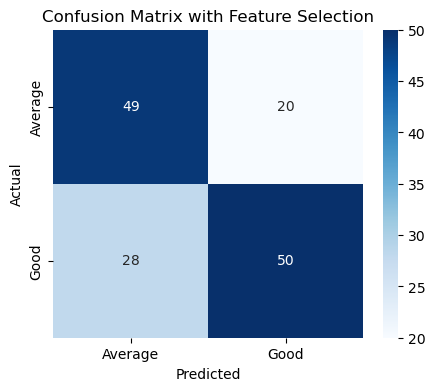

In [22]:
# Feature selection based on importance threshold (modify threshold as needed)
threshold = 0.001
important_features = [feature for feature, importance in importance_data if importance > threshold]

# Filter features based on importance
selector = SelectFromModel(rf_classifier, threshold=threshold)
X_train_filtered = selector.fit_transform(X_train_scaled, y_train)
X_test_filtered = selector.transform(X_test_scaled)

# Train the Random Forest model with filtered features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_filtered, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_filtered)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy with Feature Selection:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Good'], yticklabels=['Average', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Feature Selection')
plt.show()

In [16]:
# Deep Learning Model
model = keras.Sequential([
    layers.Input(shape=(X_train_filtered.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_filtered, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_filtered, y_test, verbose=0)
print("\nTest Accuracy (Deep Learning):", test_accuracy)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_filtered)
y_pred = (y_pred_proba > 0.5).astype(int)

# Convert predictions to binary classes
y_pred_binary = label_encoder.inverse_transform(y_pred)

# Generate classification report
print("\nClassification Report (Deep Learning):")
print(classification_report(y_test, y_pred))

Epoch 1/20
15/15 [==============================] - 1s 14ms/step - loss: 0.7125 - accuracy: 0.5586 - val_loss: 0.6756 - val_accuracy: 0.5593
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5991 - val_loss: 0.6469 - val_accuracy: 0.6102
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5778 - val_loss: 0.6268 - val_accuracy: 0.6780
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.6525 - val_loss: 0.6095 - val_accuracy: 0.6949
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.6418 - val_loss: 0.5864 - val_accuracy: 0.7119
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5983 - accuracy: 0.6716 - val_loss: 0.5732 - val_accuracy: 0.7373
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.6567 - val_loss: 0.5617 - val_accuracy: 0.7288
Epoch 8/20
15/15 [=

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Confusion Matrix (Deep Learning):
[[49 20]
 [28 50]]


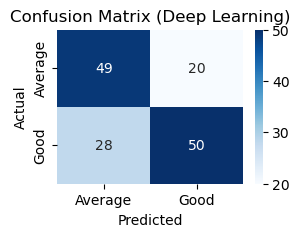

In [23]:
# Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Deep Learning):")
print(cm_dl)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Good'], yticklabels=['Average', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Deep Learning)')
plt.show()

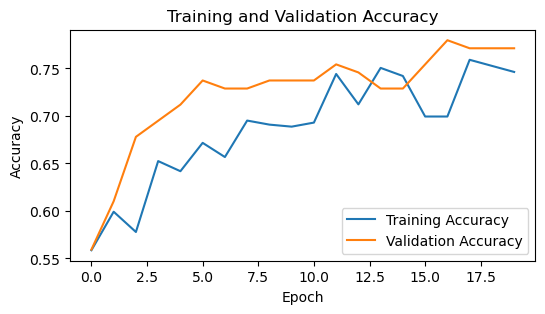

In [24]:
# Plot training history
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()